In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
from sklearn.metrics import r2_score

In [2]:
poro = [0.11, 0.2450000000000001, 0.27500000000000013, 0.14, 0.23000000000000015, 0.1, 0.20000000000000012,
        0.275, 0.14000000000000007, 0.23000000000000004, 0.2300000000000002, 0.3500000000000002, 0.1400000000000001,
        0.3350000000000002, 0.18500000000000005, 0.35000000000000014]

perm = [24.364987921406946,268.57955936987156, 362.5444837503034, 32.88929354219411, 660.599119819299,
        44.39590256288329, 489.3838645284421, 59.92820009479407, 147.39958739919183, 80.89460872013487,
        1624.8116503350923, 1203.6900757441688, 198.9686312838679, 2193.266316856925, 109.19630006628867,
        891.7155401650367]

swcr = [0.37190351403978517, 0.28439951403978503, 0.299711514039785, 0.35721551403978513, 0.270335514039785,
        0.3425275140397851, 0.165023514039785, 0.3278395140397851, 0.3137755140397851, 0.3131515140397851,
        0.13627151403978496, 0.12095951403978494, 0.2090875140397851, 0.21158351403978498, 0.35846351403978505,
        0.255647514039785]

sowcr = [0.23118500544216392, 0.1993130054421639, 0.1753290054421639, 0.26720100544216385,
         0.16736100544216392, 0.22321700544216394, 0.21134500544216384, 0.21923300544216395,
         0.18728100544216386, 0.17524900544216393, 0.2154090054421639, 0.15939300544216384,
         0.2232970054421639, 0.17142500544216388, 0.23126500544216388, 0.20337700544216386]

krwr = [0.1416816732030842, 0.18920167320308434, 0.2101416732030844, 0.07262167320308421,
        0.3120216732030844, 0.09356167320308426, 0.23108167320308437, 0.08450167320308422,
        0.1473216732030843, 0.19544167320308428, 0.3148416732030845, 0.3239016732030845, 0.22826167320308433,
        0.45578167320308444, 0.21638167320308435, 0.33296167320308445]

krorw = [0.944, 0.874, 0.7, 0.713, 0.733, 0.888, 0.762, 0.855, 0.909, 0.827,
          0.813, 0.918, 0.926, 0.9, 0.752, 0.816]

Text(0, 0.5, 'krorw')

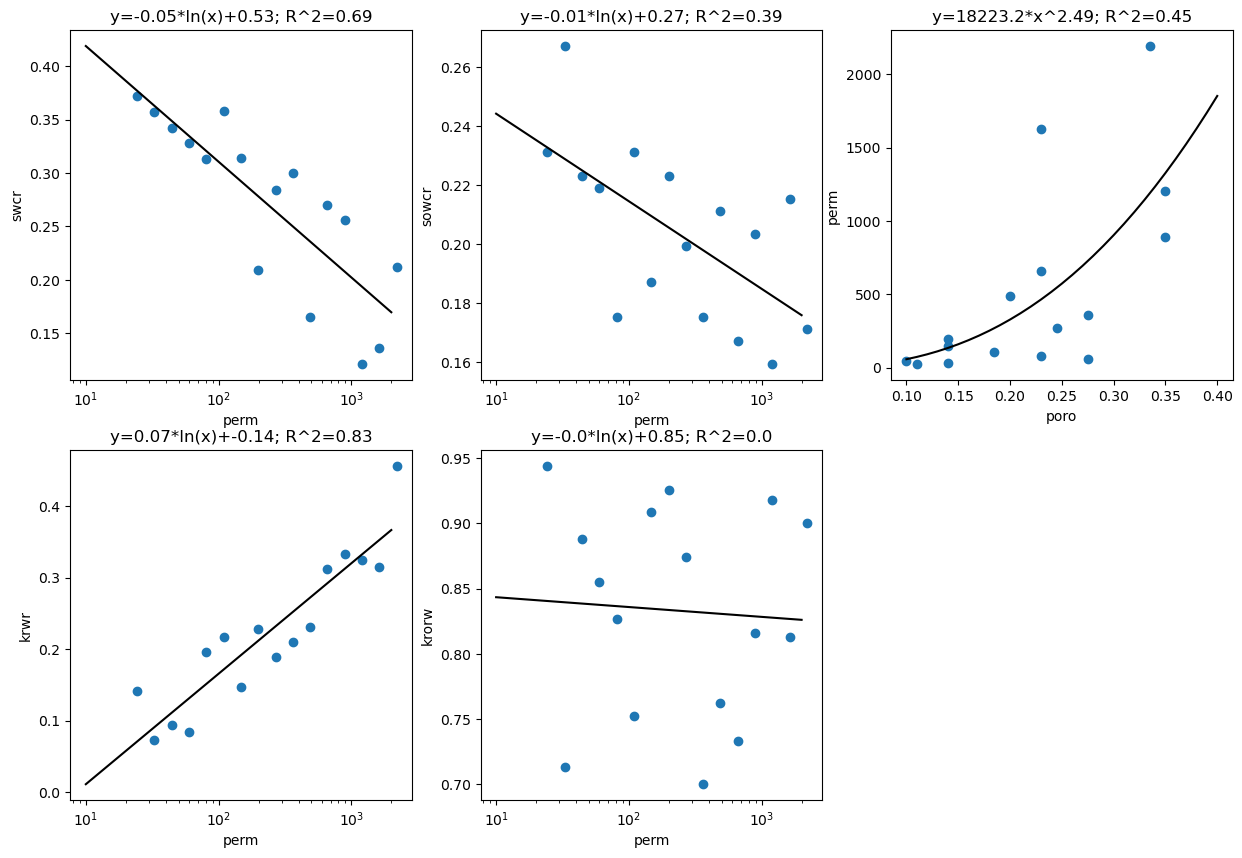

In [3]:
plt.figure(figsize=(15,10))


# корреляция swcr и perm
plt.subplot(2, 3, 1)
ax = plt.gca()
plt.scatter(perm, swcr)
ax.set_xscale('log')

def func1(x, a, b):
    y = a * np.log(x) + b
    return y

popt, pcov = curve_fit(func1, xdata=perm, ydata=swcr)
swcr_pred = func1(perm, *popt)
plt.plot(np.arange(10, 2000, 1), func1(np.arange(10, 2000, 1), *popt), color='black')
plt.title(f'y={round(popt[0],2)}*ln(x)+{round(popt[1],2)}; R^2={round(r2_score(swcr, swcr_pred), 2)}')
plt.xlabel('perm')
plt.ylabel('swcr')


# корреляция sowcr и perm
plt.subplot(2, 3, 2)
ax = plt.gca()
plt.scatter(perm, sowcr)
ax.set_xscale('log')

def func2(x, a, b):
    y = a * np.log(x) + b
    return y

popt, pcov = curve_fit(func2, xdata=perm, ydata=sowcr)
sowcr_pred = func2(perm, *popt)
plt.plot(np.arange(10, 2000, 1), func2(np.arange(10, 2000, 1), *popt), color='black')
plt.title(f'y={round(popt[0],2)}*ln(x)+{round(popt[1],2)}; R^2={round(r2_score(sowcr, sowcr_pred), 2)}')
plt.xlabel('perm')
plt.ylabel('sowcr')


# корреляция perm и poro
plt.subplot(2, 3, 3)
plt.scatter(poro, perm)

def func3(x, a, b):
    y = a * x ** b
    return y

popt, pcov = curve_fit(func3, xdata=poro, ydata=perm)
perm_pred = func3(poro, *popt)
plt.plot(np.arange(0.1, 0.4, 0.01), func3(np.arange(0.1, 0.4, 0.01), *popt), color='black')
plt.title(f'y={round(popt[0],2)}*x^{round(popt[1],2)}; R^2={round(r2_score(perm, perm_pred), 2)}')
plt.xlabel('poro')
plt.ylabel('perm')


# корреляция krwr и perm
plt.subplot(2, 3, 4)
ax = plt.gca()
plt.scatter(perm, krwr)
ax.set_xscale('log')

def func4(x, a, b):
    y = a * np.log(x) + b
    return y

popt, pcov = curve_fit(func4, xdata=perm, ydata=krwr)
krwr_pred = func4(perm, *popt)
plt.plot(np.arange(10, 2000, 1), func4(np.arange(10, 2000, 1), *popt), color='black')
plt.title(f'y={round(popt[0],2)}*ln(x)+{round(popt[1],2)}; R^2={round(r2_score(krwr, krwr_pred), 2)}')
plt.xlabel('perm')
plt.ylabel('krwr')


# корреляция krorw и perm
plt.subplot(2, 3, 5)
ax = plt.gca()
plt.scatter(perm, krorw)
ax.set_xscale('log')

def func5(x, a, b):
    y = a * np.log(x) + b
    return y

popt, pcov = curve_fit(func5, xdata=perm, ydata=krorw)
krorw_pred = func5(perm, *popt)
plt.plot(np.arange(10, 2000, 1), func5(np.arange(10, 2000, 1), *popt), color='black')
plt.title(f'y={round(popt[0],2)}*ln(x)+{round(popt[1],2)}; R^2={round(r2_score(krorw, krorw_pred), 2)}')
plt.xlabel('perm')
plt.ylabel('krorw')